# Autocalibration
## Step 3. [VEGC-leave]
### Part 1 [NPP]

In [ ]:
import Pkg; Pkg.add("PyCall")

    Updating registry at `~/.julia/registries/General.toml`


In [1]:
import Mads
import PyCall
@show pwd()

pwd() = "/work/scripts"


"/work/scripts"

In [2]:
PyCall.py"""

import sys,os
sys.path.append(os.path.join('/work','scripts'))
import TEM

def run_TEM(x):
    
    for j in range(len(dvmdostem.params)):
        dvmdostem.params[j]['val']=x[j]   
    # update param files
    dvmdostem.clean()
    dvmdostem.setup(calib=True)
    dvmdostem.update_params()
    dvmdostem.run(calib=True)

    return dvmdostem.get_calibration_outputs()[24:32] #NPP

def get_param_targets():
    return dvmdostem.get_calibration_outputs(calib=True)[24:32] #NPP

dvmdostem=TEM.TEM_model()
dvmdostem.calib_mode='VEGC' 
dvmdostem.opt_run_setup='--pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0'
dvmdostem.set_params(cmtnum=5, params=['krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)', \
                                       'krb(1)','krb(1)','krb(1)',  \
                                       'krb(2)','krb(2)','krb(2)','krb(2)','krb(2)' ], \
                               pftnums=[0,1,2,3,4,5,6,7, \
                                        0,1,2, \
                                        0,1,2,3,4])
"""
initial_guess=[-0.5, -3.1, -3.0, -9.9,  -1.0,  -1.5,  -3.2, -5.7, 
               -6.5, -6.3, -4.7, -5.45, -5.56, -4.05, -2.1, -3.9]
y_init=PyCall.py"run_TEM"(initial_guess)

NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets

8-element Vector{Float64}:
 16.462960056605517
  0.5823348272944713
 46.26740425287862
 98.68184219282848
  0.25384823455897276
  3.540900887735188
 13.612081760307774
  8.680209750158246

In [3]:
function TEM_pycall(parameters::AbstractVector)
        predictions = PyCall.py"run_TEM"(parameters)
        return predictions
end
obs=PyCall.py"get_param_targets"()#include NPP
obs_time=1:length(obs)

Loading calibration_targets from : ['/work/calibration']
Resetting path...


1:8

In [4]:
md = Mads.createproblem(initial_guess, obs, TEM_pycall;
    paramkey=["krb00","krb01","krb02","krb03","krb04","krb05","krb06","krb07",
              "krb10","krb11","krb12",
              "krb20","krb21","krb22","krb23","krb24"],
    paramdist=[
        "Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-15, -0.1)","Uniform(-10, -0.1)",
        "Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)",
        "Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)",
        "Uniform(-10, -0.1)"],
    obstime=obs_time,
    #obsweight=[100,10,10,10,10,10,10,10,90,100,50,10,10,10,50,100,100,100,50,10,10,50,100,100],
    problemname="Calibration_VEGC")

Mads.showparameters(md)
Mads.showobservations(md)

krb00 =            -0.5 distribution = Uniform(-10, -0.1) 
krb01 =            -3.1 distribution = Uniform(-10, -0.1) 
krb02 =              -3 distribution = Uniform(-10, -0.1) 
krb03 =            -9.9 distribution = Uniform(-15, -0.1) 
krb04 =              -1 distribution = Uniform(-10, -0.1) 
krb05 =            -1.5 distribution = Uniform(-10, -0.1) 
krb06 =            -3.2 distribution = Uniform(-10, -0.1) 
krb07 =            -5.7 distribution = Uniform(-10, -0.1) 
krb10 =            -6.5 distribution = Uniform(-10, -0.1) 
krb11 =            -6.3 distribution = Uniform(-10, -0.1) 
krb12 =            -4.7 distribution = Uniform(-10, -0.1) 
krb20 =           -5.45 distribution = Uniform(-10, -0.1) 
krb21 =           -5.56 distribution = Uniform(-10, -0.1) 
krb22 =           -4.05 distribution = Uniform(-10, -0.1) 
krb23 =            -2.1 distribution = Uniform(-10, -0.1) 
krb24 =            -3.9 distribution = Uniform(-10, -0.1) 
Number of optimizable parameters: 16
o1         target =

In [7]:
localsa = Mads.localsa(md; filename="model_diagnostics.png", par=initial_guess)

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outs

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


┌ Warning: 2022-09-15 01:20:00 Parameters without any impact on the observations:
└ @ Mads /home/develop/.julia/packages/Mads/YEqVh/src/MadsLog.jl:53


cfall00
cfall01
cfall02
cfall03
cfall04

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets f

Dict{String, Any} with 6 entries:
  "of"          => 2384.37
  "jacobian"    => [0.0 0.0 … 0.0755774 -0.000936112; 0.0 0.0 … -0.000357098 3.…
  "covar"       => [1.059e12 6.28313e11 … -2.16274e12 1.86405e10; 6.09485e11 3.…
  "eigenmatrix" => [-0.0138475 -0.00437833 … -0.0717533 0.100158; 0.196849 -0.0…
  "eigenvalues" => [0.000380597, 0.00640788, 0.022636, 0.049355, 0.0794525, 0.6…
  "stddev"      => [Inf, Inf, Inf, Inf, Inf, 1.02908e6, 6.12719e5, 8.78062e5, 6…

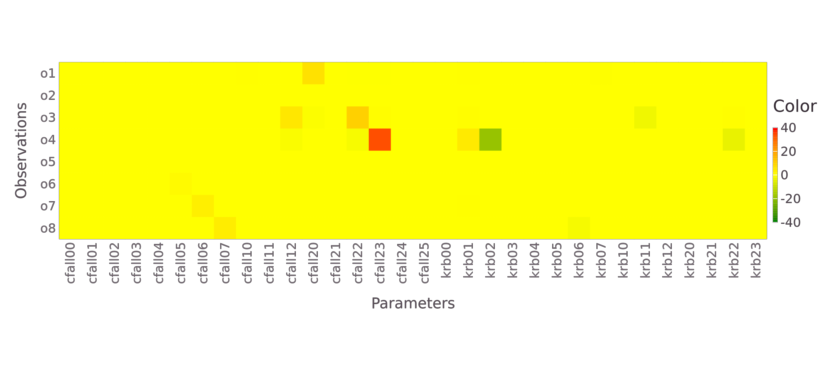

In [8]:
Mads.display("model_diagnostics-jacobian.png")

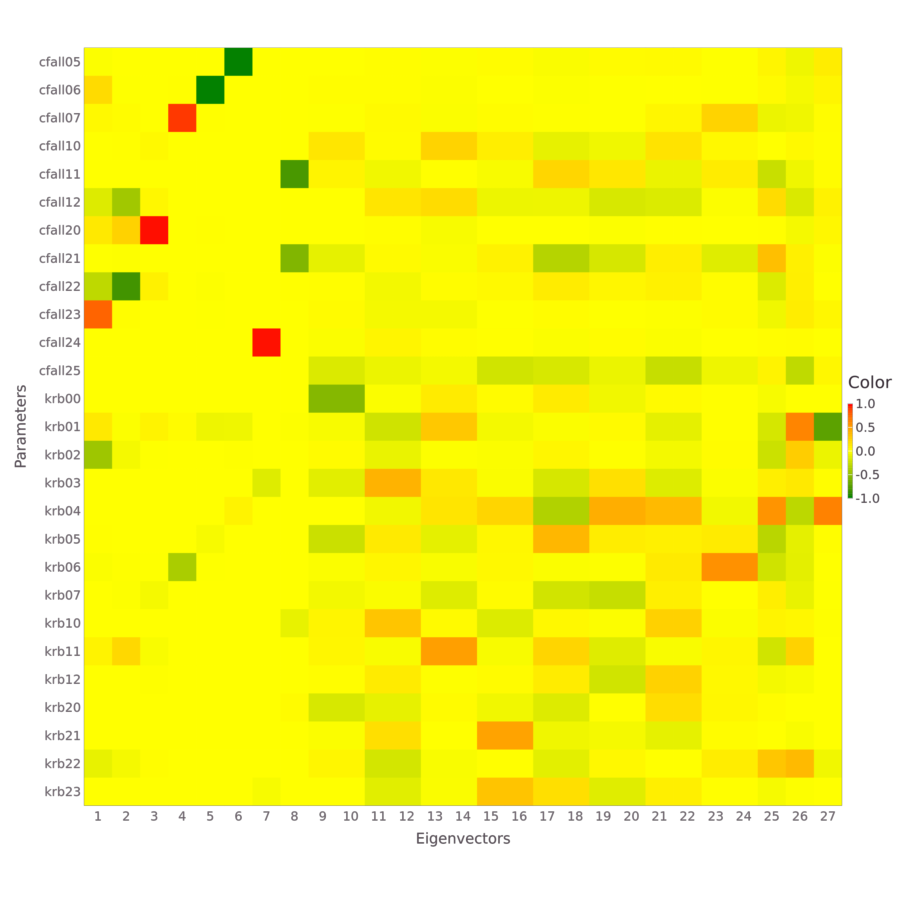

In [9]:
Mads.display("model_diagnostics-eigenmatrix.png")

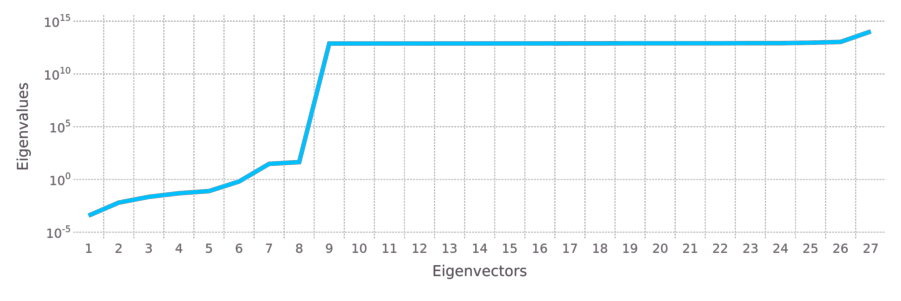

In [10]:
Mads.display("model_diagnostics-eigenvalues.png")

## round2 (cfall and krb)

In [2]:
PyCall.py"""

import sys,os
sys.path.append(os.path.join('/work','scripts'))
import TEM

def run_TEM(x):
    
    for j in range(len(dvmdostem.params)):
        dvmdostem.params[j]['val']=x[j]   
    # update param files
    dvmdostem.clean()
    dvmdostem.setup(calib=True)
    dvmdostem.update_params()
    dvmdostem.run(calib=True)

    return dvmdostem.get_calibration_outputs()[24:48]

def get_param_targets():
    return dvmdostem.get_calibration_outputs(calib=True)[24:48]

dvmdostem=TEM.TEM_model()
dvmdostem.calib_mode='VEGC'
dvmdostem.opt_run_setup='--pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0'
dvmdostem.set_params(cmtnum=5, params=['cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)', \
                                       'cfall(1)','cfall(1)','cfall(1)', \
                                       'cfall(2)','cfall(2)','cfall(2)','cfall(2)','cfall(2)', \
                                       'krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)', \
                                       'krb(1)','krb(1)','krb(1)',  \
                                       'krb(2)','krb(2)','krb(2)','krb(2)','krb(2)' ], \
                               pftnums=[0,1,2,3,4,5,6,7, \
                                        0,1,2, \
                                        0,1,2,3,4, \
                                        0,1,2,3,4,5,6,7, \
                                        0,1,2, \
                                        0,1,2,3,4])
"""
initial_guess=[0.0901, 0.1099, 0.080001, 0.059997, 0.045, 0.096, 0.099, 0.041,
                           0.0025, 0.0007, 0.0001, 
                           0.0015, 0.000320, 0.0001, 0.02, 0.000301,
                           -0.10, -0.22, -2.29, -1.22, -3.3, -0.15, -0.1, -1.24, 
                           -7.27, -5.58, -5.77, 
                           -6.63, -6.3, -3.86, -0.81, -4.32]
#y_init=PyCall.py"run_TEM"()
#y_truth_cmax_gpp=PyCall.py"run_TEM"([134.4, 4.4, 337.6, 594.0, 3.5, 32.3, 90.3, 47.3])

32-element Vector{Float64}:
  0.0901
  0.1099
  0.080001
  0.059997
  0.045
  0.096
  0.099
  0.041
  0.0025
  0.0007
  0.0001
  0.0015
  0.00032
  ⋮
 -3.3
 -0.15
 -0.1
 -1.24
 -7.27
 -5.58
 -5.77
 -6.63
 -6.3
 -3.86
 -0.81
 -4.32

In [11]:
function TEM_pycall(parameters::AbstractVector)
        predictions = PyCall.py"run_TEM"(parameters)
        return predictions
end
obs=PyCall.py"get_param_targets"()#include NPP
obs_time=1:length(obs)

Loading calibration_targets from : ['/work/calibration']
Resetting path...


1:24

In [12]:
md = Mads.createproblem(initial_guess, obs, TEM_pycall;
    paramkey=["cfall00","cfall01","cfall02","cfall03","cfall04","cfall05","cfall06","cfall07",
              "cfall10","cfall11","cfall12",
              "cfall20","cfall21","cfall22","cfall23","cfall24",
              "krb00","krb01","krb02","krb03","krb04","krb05","krb06","krb07",
              "krb10","krb11","krb12",
              "krb20","krb21","krb22","krb23","krb24"],
    paramdist=["Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)",
        "Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)",
        "Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)",
        "Uniform(0.00001, 0.09)",
        "Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-15, -0.1)","Uniform(-10, -0.1)",
        "Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)",
        "Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)",
        "Uniform(-10, -0.1)"],
    obstime=obs_time,
    problemname="Calibration_VEGC")

Mads.showparameters(md)
Mads.showobservations(md)

cfall00 =          0.0901 distribution = Uniform(0.00001, 0.2) 
cfall01 =          0.1099 distribution = Uniform(0.00001, 0.2) 
cfall02 =        0.080001 distribution = Uniform(0.00001, 0.2) 
cfall03 =        0.059997 distribution = Uniform(0.00001, 0.2) 
cfall04 =           0.045 distribution = Uniform(0.00001, 0.2) 
cfall05 =           0.096 distribution = Uniform(0.00001, 0.2) 
cfall06 =           0.099 distribution = Uniform(0.00001, 0.2) 
cfall07 =           0.041 distribution = Uniform(0.00001, 0.2) 
cfall10 =          0.0025 distribution = Uniform(0.00001, 0.09) 
cfall11 =          0.0007 distribution = Uniform(0.00001, 0.09) 
cfall12 =          0.0001 distribution = Uniform(0.00001, 0.09) 
cfall20 =          0.0015 distribution = Uniform(0.00001, 0.09) 
cfall21 =         0.00032 distribution = Uniform(0.00001, 0.09) 
cfall22 =          0.0001 distribution = Uniform(0.00001, 0.09) 
cfall23 =            0.02 distribution = Uniform(0.00001, 0.09) 
cfall24 =        0.000301 distrib

In [13]:
calib_param, calib_information = Mads.calibrate(md)

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outs

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 

(OrderedCollections.OrderedDict("cfall00" => 0.0901, "cfall01" => 0.1099, "cfall02" => 0.080001, "cfall03" => 0.059997, "cfall04" => 0.045, "cfall05" => 0.09580210397827865, "cfall06" => 0.0984554612403043, "cfall07" => 0.040367904558658, "cfall10" => 0.000805812858348011, "cfall11" => 0.0007004208482617639…), OptimBase.MultivariateOptimizationResults{LsqFit.LevenbergMarquardt, Float64, 1}(LsqFit.LevenbergMarquardt(), [-0.09921765812264567, 0.09911715936601545, -0.20140895464415626, -0.41162596306675814, -0.5824570414175186, -0.04006271866042724, -0.010050671737384867, -0.6311573130548851, -1.2365582057843407, -1.3954430137810792  …  1.5707963267948966, 0.8783663512221215, -0.46506941891102516, -0.10727634858674913, -0.14597238854420408, -0.3248766800529701, -0.25528920642641967, 0.2427820773366253, 1.0285772370577635, 0.14801461449659317], [-0.09921765812264567, 0.09911715936601545, -0.20140895464415626, -0.41162596306675814, -0.5824570414175186, -0.042043447035549304, -0.015496782657

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


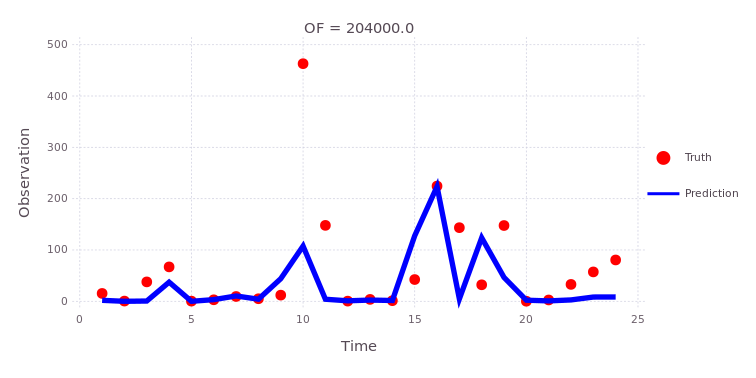

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /w

In [14]:
Mads.plotmatches(md, calib_param)

## round 3 (cfall only)

In [2]:
PyCall.py"""

import sys,os
sys.path.append(os.path.join('/work','scripts'))
import TEM

def run_TEM(x):
    
    for j in range(len(dvmdostem.params)):
        dvmdostem.params[j]['val']=x[j]   
    # update param files
    dvmdostem.clean()
    dvmdostem.setup(calib=True)
    dvmdostem.update_params()
    dvmdostem.run(calib=True)

    return dvmdostem.get_calibration_outputs()[32:48]

def get_param_targets():
    return dvmdostem.get_calibration_outputs(calib=True)[32:48]

dvmdostem=TEM.TEM_model()
dvmdostem.calib_mode='VEGC'
dvmdostem.opt_run_setup='--pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0'
dvmdostem.set_params(cmtnum=5, params=['cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)', \
                                       'cfall(1)','cfall(1)','cfall(1)', \
                                       'cfall(2)','cfall(2)','cfall(2)','cfall(2)','cfall(2)'], \
                               pftnums=[0,1,2,3,4,5,6,7, \
                                        0,1,2, \
                                        0,1,2,3,4])
"""
initial_guess=[0.09, 0.11, 0.080, 0.057, 0.045, 0.096, 0.099, 0.04, 
               4.4595e-5, 0.0007, 0.0004,
               0.00138, 0.0003, 8.2057e-5, 0.021, 0.0003]

function TEM_pycall(parameters::AbstractVector)
        predictions = PyCall.py"run_TEM"(parameters)
        return predictions
end
obs=PyCall.py"get_param_targets"()# VEGC only
obs_time=1:length(obs)

Loading calibration_targets from : ['/work/calibration']
Resetting path...


1:16

In [8]:
md = Mads.createproblem(initial_guess, obs, TEM_pycall;
    paramkey=["cfall00","cfall01","cfall02","cfall03","cfall04","cfall05","cfall06","cfall07",
              "cfall10","cfall11","cfall12",
              "cfall20","cfall21","cfall22","cfall23","cfall24","cfall25"],
    paramdist=["Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)",
        "Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)",
        "Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)",
        "Uniform(0.00001, 0.09)"],
    obstime=obs_time,
    obsweight=[10,100,100,10,10,10,50,100,100,100,50,10,10,50,100,100],
    paramlog=trues(16),
    problemname="Calibration_VEGC_only")

Mads.showparameters(md)
Mads.showobservations(md)

cfall00 =            0.09 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall01 =            0.11 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall02 =            0.08 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall03 =           0.057 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall04 =           0.045 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall05 =           0.096 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall06 =           0.099 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall07 =            0.04 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall10 =      4.4595e-05 log-transformed distribution = Uniform(0.00001, 0.09) 
cfall11 =          0.0007 log-transformed distribution = Uniform(0.00001, 0.09) 
cfall12 =          0.0004 log-transformed distribution = Uniform(0.00001, 0.09) 
cfall20 =         0.00138 log-transformed distribution = Uniform(0.00001, 0.09) 
cfall21 =          0.0003 log-transf

In [4]:
localsa = Mads.localsa(md; filename="VEGC_only_model_diagnostics.png", par=initial_guess)

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outs

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/s

Dict{String, Any} with 6 entries:
  "of"          => 2.85056e5
  "jacobian"    => [-10.6022 0.00171185 … 1.03781 0.00290394; -0.747129 0.00176…
  "covar"       => [0.00887203 0.0010952 … 7.5421e-5 0.000373028; 0.0010952 9.0…
  "eigenmatrix" => [-0.00307626 0.00686752 … 0.000120204 -0.000120838; -2.45195…
  "eigenvalues" => [3.9404e-5, 6.00131e-5, 0.00011706, 0.000471074, 0.00105939,…
  "stddev"      => [0.0941914, 3.01262, 0.0225263, 0.0134087, 2.56608, 0.452728…

In [5]:
Mads.display("VEGC_only_model_diagnostics.png")

┌ Warning: File `VEGC_only_model_diagnostics.png` is missing!
└ @ Mads /home/develop/.julia/packages/Mads/YEqVh/src/MadsDisplay.jl:12


In [ ]:
calib_param, calib_information = Mads.calibrate(md, tolOF=0.01, tolOFcount=3)

In [ ]:
Mads.plotmatches(md, calib_param)

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


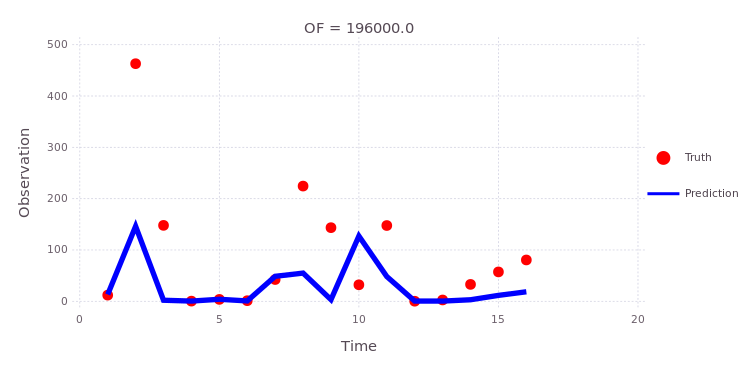

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /w

In [7]:
Mads.plotmatches(md, calib_param)

## round 4

In [8]:
initial_guess=collect(values(calib_param))
md = Mads.createproblem(initial_guess, obs, TEM_pycall;
    paramkey=["cfall00","cfall01","cfall02","cfall03","cfall04","cfall05","cfall06","cfall07",
              "cfall10","cfall11","cfall12",
              "cfall20","cfall21","cfall22","cfall23","cfall24","cfall25"],
    paramdist=["Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)",
        "Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)",
        "Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)",
        "Uniform(0.00001, 0.09)"],
    obstime=obs_time,
    problemname="Calibration_VEGC_only")

Mads.showparameters(md)
Mads.showobservations(md)

cfall00 =       0.0899888 distribution = Uniform(0.00001, 0.2) 
cfall01 =        0.109903 distribution = Uniform(0.00001, 0.2) 
cfall02 =       0.0801524 distribution = Uniform(0.00001, 0.2) 
cfall03 =       0.0565383 distribution = Uniform(0.00001, 0.2) 
cfall04 =        0.045003 distribution = Uniform(0.00001, 0.2) 
cfall05 =       0.0959463 distribution = Uniform(0.00001, 0.2) 
cfall06 =       0.0986742 distribution = Uniform(0.00001, 0.2) 
cfall07 =       0.0399572 distribution = Uniform(0.00001, 0.2) 
cfall10 =      4.4595e-05 distribution = Uniform(0.00001, 0.09) 
cfall11 =     0.000700152 distribution = Uniform(0.00001, 0.09) 
cfall12 =      0.00043652 distribution = Uniform(0.00001, 0.09) 
cfall20 =      0.00137878 distribution = Uniform(0.00001, 0.09) 
cfall21 =     0.000322386 distribution = Uniform(0.00001, 0.09) 
cfall22 =      8.2057e-05 distribution = Uniform(0.00001, 0.09) 
cfall23 =       0.0210117 distribution = Uniform(0.00001, 0.09) 
cfall24 =      0.00030146 distrib

In [9]:
calib_param, calib_information = Mads.calibrate(md)

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outs

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /wo

(OrderedCollections.OrderedDict("cfall00" => 0.0899888276723434, "cfall01" => 0.10990318019973846, "cfall02" => 0.08015237176960634, "cfall03" => 0.05653827960492233, "cfall04" => 0.045002997790118134, "cfall05" => 0.09594630103730939, "cfall06" => 0.09867424912875208, "cfall07" => 0.03995724767341157, "cfall10" => 4.459498903685705e-5, "cfall11" => 0.0007001519001224587…), OptimBase.MultivariateOptimizationResults{LsqFit.LevenbergMarquardt, Float64, 1}(LsqFit.LevenbergMarquardt(), [-0.10033499414966425, 0.09914911986900583, -0.19986417264759776, -0.4496928468100287, -0.5824211432530022, -0.04060017220318787, -0.013308566982067647, -0.6441356956526971, -1.5315799651936755, -1.3954236636400839, -1.4329972211088842, -1.3235058204702284, -1.4528919024763585, -1.5141947115632468, -0.5624297660775381, -1.4569138891832096], [-0.10033499414966425, 0.09914911986900583, -0.19986417264759776, -0.4496928468100287, -0.5824211432530022, -0.04060017220318787, -0.013308566982067647, -0.64413569565269

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


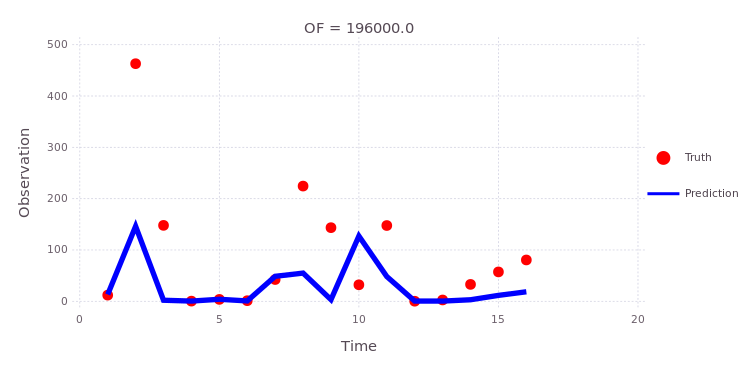

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /w

In [10]:
Mads.plotmatches(md, calib_param)

In [11]:
calib_param

OrderedCollections.OrderedDict{String, Float64} with 16 entries:
  "cfall00" => 0.0899888
  "cfall01" => 0.109903
  "cfall02" => 0.0801524
  "cfall03" => 0.0565383
  "cfall04" => 0.045003
  "cfall05" => 0.0959463
  "cfall06" => 0.0986742
  "cfall07" => 0.0399572
  "cfall10" => 4.4595e-5
  "cfall11" => 0.000700152
  "cfall12" => 0.00043652
  "cfall20" => 0.00137878
  "cfall21" => 0.000322386
  "cfall22" => 8.2057e-5
  "cfall23" => 0.0210117
  "cfall24" => 0.00030146

## round 5

In [3]:
PyCall.py"""

import sys,os
sys.path.append(os.path.join('/work','scripts'))
import TEM

def run_TEM(x):
    
    for j in range(len(dvmdostem.params)):
        dvmdostem.params[j]['val']=x[j]   
    # update param files
    dvmdostem.clean()
    dvmdostem.setup(calib=True)
    dvmdostem.update_params()
    dvmdostem.run(calib=True)

    return dvmdostem.get_calibration_outputs()[24:48]

def get_param_targets():
    return dvmdostem.get_calibration_outputs(calib=True)[24:48]

dvmdostem=TEM.TEM_model()
dvmdostem.calib_mode='VEGC'
dvmdostem.opt_run_setup='--pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0'
dvmdostem.set_params(cmtnum=5, params=['cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)', \
                                       'cfall(1)','cfall(1)','cfall(1)', \
                                       'cfall(2)','cfall(2)','cfall(2)','cfall(2)','cfall(2)', \
                                       'krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)', \
                                       'krb(1)','krb(1)','krb(1)',  \
                                       'krb(2)','krb(2)','krb(2)','krb(2)','krb(2)' ], \
                               pftnums=[0,1,2,3,4,5,6,7, \
                                        0,1,2, \
                                        0,1,2,3,4, \
                                        0,1,2,3,4,5,6,7, \
                                        0,1,2, \
                                        0,1,2,3,4])
"""
initial_guess=[0.09, 0.11, 0.080, 0.057, 0.045, 0.096, 0.099, 0.04, 
               4.4595e-5, 0.0007, 0.0004,
               0.00138, 0.0003, 8.2057e-5, 0.021, 0.0003,
                -0.10, -0.22, -2.29, -1.22, -3.3, -0.15, -0.1, -1.24, 
                -7.27, -5.58, -5.77, 
                -6.63, -6.3, -3.86, -0.81, -4.32]

#0.09, 0.11, 0.08, 0.057, 0.045, 0.096, 0.099, 0.04, 
#4.4595e-5, 0.0007, 0.0004, 
#0.00138, 0.0003, 8.2057e-5, 0.021, 0.0003, 
#-0.01, -0.22, -2.29, -1.22, -3.3, -0.15, -0.01, -1.24, 
#-7.27, -5.58, -5.77, 
#-6.63, -6.3, -3.86, -0.81, -4.32]
#y_init=PyCall.py"run_TEM"()
#y_truth_cmax_gpp=PyCall.py"run_TEM"([134.4, 4.4, 337.6, 594.0, 3.5, 32.3, 90.3, 47.3])

function TEM_pycall(parameters::AbstractVector)
        predictions = PyCall.py"run_TEM"(parameters)
        return predictions
end
obs=PyCall.py"get_param_targets"()# VEGC only
obs_time=1:length(obs)

Loading calibration_targets from : ['/work/calibration']
Resetting path...


1:24

In [4]:
md = Mads.createproblem(initial_guess, obs, TEM_pycall;
    paramkey=["cfall00","cfall01","cfall02","cfall03","cfall04","cfall05","cfall06","cfall07",
              "cfall10","cfall11","cfall12",
              "cfall20","cfall21","cfall22","cfall23","cfall24",
              "krb00","krb01","krb02","krb03","krb04","krb05","krb06","krb07",
              "krb10","krb11","krb12",
              "krb20","krb21","krb22","krb23","krb24"],
    paramdist=["Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)",
        "Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)",
        "Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)",
        "Uniform(0.00001, 0.09)",
        "Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-15, -0.1)","Uniform(-10, -0.1)",
        "Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)",
        "Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)",
        "Uniform(-10, -0.1)"],
    obstime=obs_time,
    paramlog=[trues(16); falses(16)],
    problemname="Calibration_VEGC")

Mads.showparameters(md)
Mads.showobservations(md)

cfall00 =            0.09 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall01 =            0.11 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall02 =            0.08 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall03 =           0.057 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall04 =           0.045 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall05 =           0.096 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall06 =           0.099 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall07 =            0.04 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall10 =      4.4595e-05 log-transformed distribution = Uniform(0.00001, 0.09) 
cfall11 =          0.0007 log-transformed distribution = Uniform(0.00001, 0.09) 
cfall12 =          0.0004 log-transformed distribution = Uniform(0.00001, 0.09) 
cfall20 =         0.00138 log-transformed distribution = Uniform(0.00001, 0.09) 
cfall21 =          0.0003 log-transf

In [8]:
Mads.getparamsinit(md)

32-element Vector{Float64}:
  0.09
  0.11
  0.08
  0.057
  0.045
  0.096
  0.099
  0.04
  4.4595e-5
  0.0007
  0.0004
  0.00138
  0.0003
  ⋮
 -3.3
 -0.15
 -0.1
 -1.24
 -7.27
 -5.58
 -5.77
 -6.63
 -6.3
 -3.86
 -0.81
 -4.32

In [5]:
calib_param, calib_information = Mads.calibrate(md, tolOF=0.01, tolOFcount=3)

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outs

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 

(OrderedCollections.OrderedDict("cfall00" => 0.023061790297899565, "cfall01" => 0.11028497832465453, "cfall02" => 0.08145944818092485, "cfall03" => 0.1359907087410656, "cfall04" => 0.04535288467415045, "cfall05" => 0.06508043742339632, "cfall06" => 0.014293770333521251, "cfall07" => 0.0013064234493624669, "cfall10" => 1.0609430610745567e-5, "cfall11" => 0.0006583754172448104…), OptimBase.MultivariateOptimizationResults{LsqFit.LevenbergMarquardt, Float64, 1}(LsqFit.LevenbergMarquardt(), [0.9949690648761715, 1.074321953711466, 0.9526531769570868, 0.8427866198617268, 0.7736650000855532, 1.0193651954002685, 1.0313435940591384, 0.740931532960472, -0.7363664832136664, -0.06682520166700674  …  1.5707963267948966, 0.8783663512221215, -0.46506941891102516, -0.10727634858674913, -0.14597238854420408, -0.3248766800529701, -0.25528920642641967, 0.2427820773366253, 1.0285772370577635, 0.14801461449659317], [0.5989332359128268, 1.0754200309274138, 0.9589813431703158, 1.1734781388146656, 0.7758725591

NOTE: Make sure to enable 'eq' outputs in the config file!!!


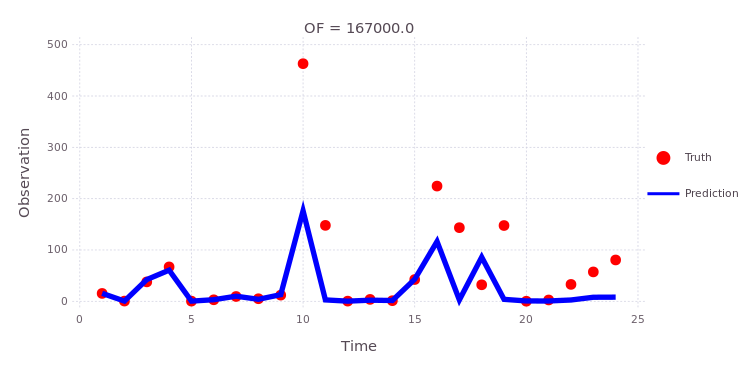

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...


In [6]:
Mads.plotmatches(md)

In [24]:
calib_param

OrderedCollections.OrderedDict{String, Float64} with 32 entries:
  "cfall00" => 0.09
  "cfall01" => 0.11
  "cfall02" => 0.08
  "cfall03" => 0.057
  "cfall04" => 0.045
  "cfall05" => 0.096
  "cfall06" => 0.099
  "cfall07" => 0.04
  "cfall10" => 4.4595e-5
  "cfall11" => 0.0007
  "cfall12" => 0.0004
  "cfall20" => 0.00138
  "cfall21" => 0.0003
  "cfall22" => 8.2057e-5
  "cfall23" => 0.021
  "cfall24" => 0.0003
  "krb00"   => -0.1
  "krb01"   => -0.22
  "krb02"   => -2.29
  "krb03"   => -1.22
  "krb04"   => -3.3
  "krb05"   => -0.15
  "krb06"   => -0.1
  "krb07"   => -1.24
  "krb10"   => -7.27
  ⋮         => ⋮

In [26]:
cdata=collect(values(calib_param))
md = Mads.createproblem(cdata, obs, TEM_pycall;
    paramkey=["cfall00","cfall01","cfall02","cfall03","cfall04","cfall05","cfall06","cfall07",
              "cfall10","cfall11","cfall12",
              "cfall20","cfall21","cfall22","cfall23","cfall24",
              "krb00","krb01","krb02","krb03","krb04","krb05","krb06","krb07",
              "krb10","krb11","krb12",
              "krb20","krb21","krb22","krb23","krb24"],
    paramdist=["Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)",
        "Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)",
        "Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)",
        "Uniform(0.00001, 0.2)",
        "Uniform(-10, -0.01)","Uniform(-10, -0.01)","Uniform(-10, -0.01)","Uniform(-15, -0.01)","Uniform(-10, -0.01)",
        "Uniform(-10, -0.01)","Uniform(-10, -0.01)","Uniform(-10, -0.01)","Uniform(-10, -0.01)","Uniform(-10, -0.01)",
        "Uniform(-10, -0.01)","Uniform(-10, -0.01)","Uniform(-10, -0.01)","Uniform(-10, -0.01)","Uniform(-10, -0.01)",
        "Uniform(-10, -0.01)"],
    obstime=obs_time,
    obsweight=[10,10,10,10,10,10,10,10,90,100,50,10,10,10,50,100,100,100,50,10,10,50,100,100],
    problemname="Calibration_VEGC")

Mads.showparameters(md)
Mads.showobservations(md)

cfall00 =            0.09 distribution = Uniform(0.00001, 0.2) 
cfall01 =            0.11 distribution = Uniform(0.00001, 0.2) 
cfall02 =            0.08 distribution = Uniform(0.00001, 0.2) 
cfall03 =           0.057 distribution = Uniform(0.00001, 0.2) 
cfall04 =           0.045 distribution = Uniform(0.00001, 0.2) 
cfall05 =           0.096 distribution = Uniform(0.00001, 0.2) 
cfall06 =           0.099 distribution = Uniform(0.00001, 0.2) 
cfall07 =            0.04 distribution = Uniform(0.00001, 0.2) 
cfall10 =      4.4595e-05 distribution = Uniform(0.00001, 0.2) 
cfall11 =          0.0007 distribution = Uniform(0.00001, 0.2) 
cfall12 =          0.0004 distribution = Uniform(0.00001, 0.2) 
cfall20 =         0.00138 distribution = Uniform(0.00001, 0.2) 
cfall21 =          0.0003 distribution = Uniform(0.00001, 0.2) 
cfall22 =      8.2057e-05 distribution = Uniform(0.00001, 0.2) 
cfall23 =           0.021 distribution = Uniform(0.00001, 0.2) 
cfall24 =          0.0003 distribution =

In [ ]:
calib_param, calib_information = Mads.calibrate(md)
calib_param, calib_information = Mads.calibrate(md)
calib_param, calib_information = Mads.calibrate(md)
calib_param, calib_information = Mads.calibrate(md)
calib_param, calib_information = Mads.calibrate(md)

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outs

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


In [ ]:
Mads.plotmatches(md, calib_param)

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


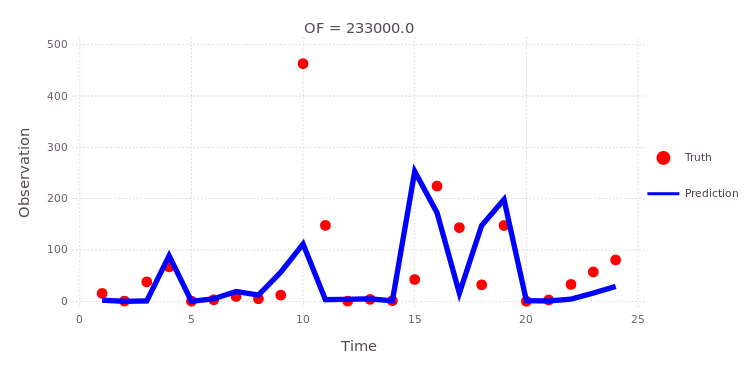

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /w

In [15]:
Mads.plotmatches(md, calib_param)

In [ ]:
calib_random_results = Mads.calibraterandom(md, 1; seed=2021, all=true)

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err 

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik

[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.jsNOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_ru

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err 

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik

[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.jsNOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_ru

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err 

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik

[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.jsNOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_ru

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err 

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik

[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.jsNOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_ru

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err 

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik

[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.jsNOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_ru

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err 

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik

[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.jsNOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_ru

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err 

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik

[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.jsNOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_ru

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err 

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik

[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.jsNOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_ru

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err 

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik

[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.jsNOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_ru

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err 

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik

[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.jsNOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_ru

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


In [15]:
initial = [43.5931, 18.7445, 63.3818, 149.999, 9.6273, 89.8862, 57.2712, 41.1524]
scatter(obs_time,obs); plot!(obs_time, initial, linewidth = 3, ylabel="GPP" )

LoadError: UndefVarError: scatter not defined

In [12]:
Mads.showparameterestimates(md, calib_param)

nmax0 =         7.51011 distribution = Uniform(1, 20) 
nmax1 =         7.21743 distribution = Uniform(1, 20) 
nmax2 =         10.9743 distribution = Uniform(1, 20) 
nmax3 =          12.592 distribution = Uniform(1, 50) 
nmax4 =         1.10638 distribution = Uniform(1, 20) 
nmax5 =               3 distribution = Uniform(1, 20) 
nmax6 =               3 distribution = Uniform(1, 20) 
nmax7 =               3 distribution = Uniform(1, 20) 
Number of optimizable parameters: 8


In [12]:
Mads.showallparameters(md)# parameterestimates(md)

cmax0 =           142.1 <- optimizable distribution = Uniform(0.1, 200) 
cmax1 =            33.6 <- optimizable distribution = Uniform(0.1, 90) 
cmax2 =           239.8 <- optimizable distribution = Uniform(0.1, 350) 
cmax3 =           473.8 <- optimizable distribution = Uniform(0.1, 600) 
cmax4 =            27.3 <- optimizable distribution = Uniform(0.1, 50) 
cmax5 =              20 <- optimizable distribution = Uniform(0.1, 350) 
cmax6 =           102.8 <- optimizable distribution = Uniform(0.1, 200) 
cmax7 =            62.4 <- optimizable distribution = Uniform(0.1, 150) 
Number of parameters: 8


In [ ]:
calib_random_results = Mads.calibraterandom_parallel(md, 1000)
calib_random_estimates = hcat(map(i->collect(values(calib_random_results[i,3])), 1:5)...)

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik

[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.jsNOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_ru

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err 

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik

[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.jsNOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


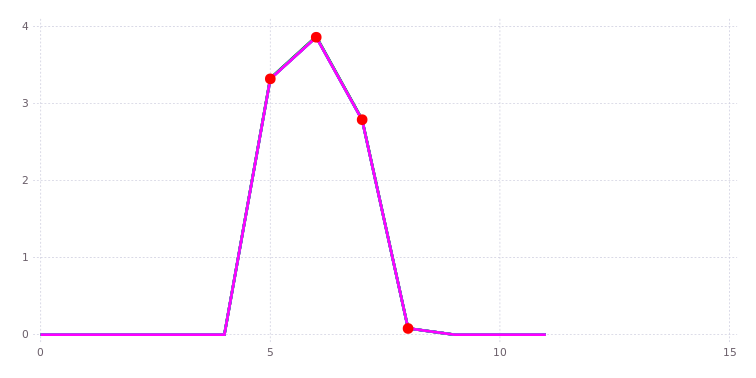

In [12]:
forward_predictions = Mads.forward(md, calib_random_estimates)
Mads.spaghettiplot(md, forward_predictions)

In [13]:
calib_random_estimates

3×5 Matrix{Float64}:
 18.0059  11.7602   8.29216  16.8494   9.1119
 26.0061  26.0027  26.0633   25.9982  25.9941
 39.3849  38.6529  39.2847   28.9517  39.9449

In [18]:
calib_random_estimates[3,:]

5-element Vector{Float64}:
 39.3848685359443
 38.65287610274849
 39.28473772516965
 28.95169176334149
 39.94493277696695

In [20]:
abs.(calib_random_estimates[3,:])

5-element Vector{Float64}:
 39.3848685359443
 38.65287610274849
 39.28473772516965
 28.95169176334149
 39.94493277696695

In [19]:
ind_n0 = abs.(calib_random_estimates[3,:]) .< 0.1
in0 = findall(ind_n0 .== true)[1]
ind_n1 = abs.(calib_random_estimates[3,:] .- 1) .< 0.1
in1 = findall(ind_n1 .== true)[1]
ind_n3 = .!(ind_n0 .| ind_n1)
in3 = findall(ind_n3 .== true)[1]
pinit = Dict(zip(Mads.getparamkeys(md), Mads.getparamsinit(md)))
optnames = ["n=0", "n=1", "n=3"]
v = [in0, in1, in3]

LoadError: BoundsError: attempt to access 0-element Vector{Int64} at index [1]

In [12]:
for i = 1:3
	println("Solution for $(optnames[i])")
	Mads.showparameters(md, calib_random_results[v[i],3])
	Mads.plotmatches(md, calib_random_results[v[i],3]; title=optnames[i])
end

localsa = Mads.localsa(md; filename="model_diagnostics.png", par=collect(values(calib_param)))

[Mads.getparamlabels(md) localsa["stddev"]]

LoadError: UndefVarError: optnames not defined

In [ ]:
chain, llhoods = Mads.emceesampling(md; numwalkers=10, nsteps=100000, burnin=10000, thinning=10, seed=2016, sigma=0.01)

f = Mads.forward(md, chain)

Mads.spaghettiplot(md, f)

In [ ]:
Mads.scatterplotsamples(md, permutedims(chain), "model_diagnostics-emcee_scatter.png")

In [ ]:
saltelli_results = Mads.saltelli(md, N=10000, seed=2016)

Mads.plotobsSAresults(md, saltelli_results)

efastresult = Mads.efast(md, N=1000, seed=2016)
Mads.plotobsSAresults(md, efastresult, filename="sensitivity_efast.png", xtitle = "Time [-]", ytitle = "Observation [-]")

In [ ]:
import Pkg; Pkg.add("Colors")
h = [0.001, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]

models = ["y = a * t + c", "y = a * t^(1.1) + b * t + c", "y = a * t^n + b * t + c", "y = a * exp(t * n) + b * t + c"]

import Gadfly
import Colors
lmin = Vector{Any}(undef, 4)
lmax = Vector{Any}(undef, 4)
colors = ["blue", "red", "green", "orange"]
for i = 1:4
	min, max = Mads.infogap_jump_polynomial(model=i, plot=true, horizons=h, retries=10, maxiter=1000, verbosity=0, seed=2015)
	lmin[i] = Gadfly.layer(x=min, y=h, Gadfly.Geom.line, Gadfly.Theme(line_width=2Gadfly.pt, line_style=[:dash], default_color=Base.parse(Colors.Colorant, colors[i])))
	lmax[i] = Gadfly.layer(x=max, y=h, Gadfly.Geom.line, Gadfly.Theme(line_width=2Gadfly.pt, line_style=[:solid], default_color=Base.parse(Colors.Colorant, colors[i])))
end
f = Gadfly.plot(lmin..., lmax..., Gadfly.Guide.xlabel("o5"), Gadfly.Guide.ylabel("Horizon of uncertainty"), Gadfly.Guide.title("Opportuneness vs. Robustness"), Gadfly.Theme(highlight_width=0Gadfly.pt), Gadfly.Guide.manual_color_key("Models", models, colors))
Gadfly.draw(Gadfly.PNG("infogap_opportuneness_vs_robustness.png", 6Gadfly.inch, 4Gadfly.inch), f)

Mads.display("infogap_opportuneness_vs_robustness.png")

In [ ]:
Local sensitivity and uncertainty quantification

In [24]:
calib_param

OrderedCollections.OrderedDict{String, Float64} with 3 entries:
  "cmax1" => 16.0098
  "cmax2" => 26.0096
  "cmax3" => 32.0488

In [22]:
localsa = Mads.localsa(md; filename="model_diagnostics.png", par=collect(values(calib_param)))



[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-c

Dict{String, Any} with 6 entries:
  "of"          => 4.00151e-5
  "jacobian"    => [0.0 0.0 0.0; 0.0 0.0 0.0; … ; 0.0 0.0 0.0; 0.0 0.0 0.0]
  "covar"       => [8.6348e6 18736.9 2.37441e7; 18736.9 60.2922 77781.6; 2.3744…
  "eigenmatrix" => [0.000127034 -0.971753 -0.236; -1.0 5.18843e-5 -0.000751916;…
  "eigenvalues" => [0.126306, 2.86828e6, 1.06403e8]
  "stddev"      => [2938.5, 7.7648, 10031.8]

In [23]:
[Mads.getparamlabels(md) localsa["stddev"]]

3×2 Matrix{Any}:
 "cmax1"   2938.5
 "cmax2"      7.7648
 "cmax3"  10031.8

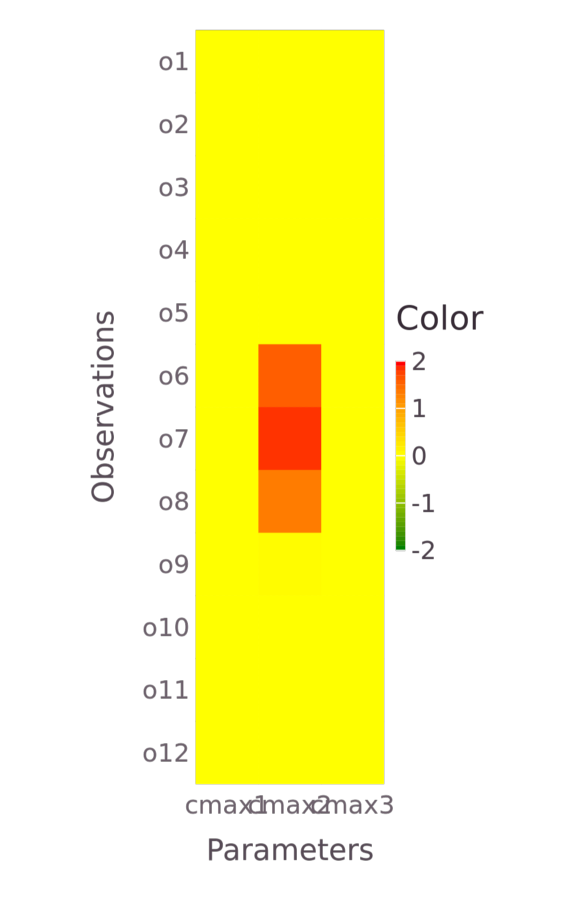

In [25]:
Mads.display("model_diagnostics-jacobian.png")

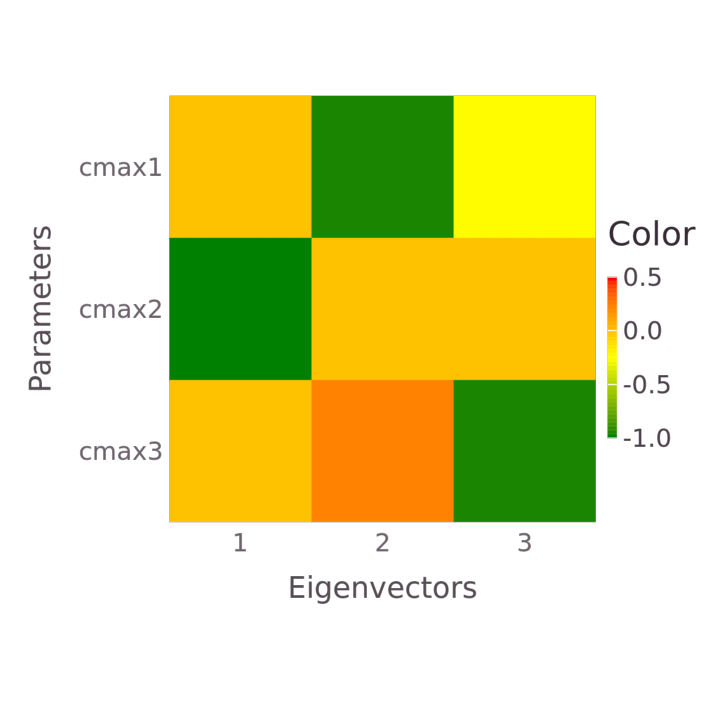

In [26]:
Mads.display("model_diagnostics-eigenmatrix.png")

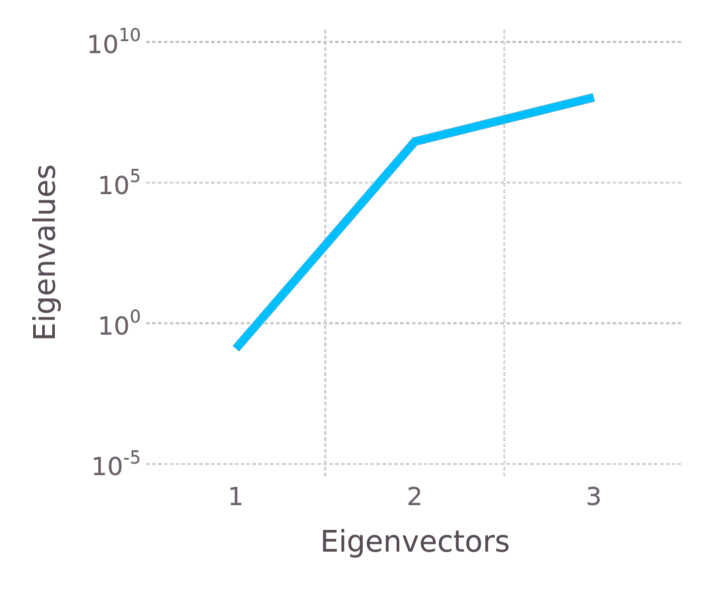

In [27]:
Mads.display("model_diagnostics-eigenvalues.png")

In [ ]:
chain, llhoods = Mads.emceesampling(md; numwalkers=10, nsteps=100000, burnin=10000, thinning=10, seed=2016, sigma=0.01)



[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup]

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

[SA:run] /work/dvmdostem -p 5 -e 5 -s 5 -t 5 -n 5 -l err --force-cmt 4 --ctrl-file /data/workflows/single_run/config/config.js

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/work

Excessive output truncated after 528448 bytes.